In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read data
df_pharma = pd.read_csv('/content/drive/MyDrive/DATA SET/data-pharmacy.csv')


# Info Dataset

In [4]:
df_pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

* **Distributor:** The name of the distributing company, which is consistent across all records as "Gottlieb-Cruickshank."
* **Customer Name**: The name of the customer or the purchasing entity.
* **City**: The city in Poland where the customer is located.
* **Country**: The country of the transaction, consistently listed as "Poland."
* **Latitude**: The latitude coordinate of the customer's city.
* **Longitude:** The longitude coordinate of the customer's city.
* **Channel:** The distribution channel, either "Hospital" or "Pharmacy."
* **Sub-channel:** Specifies whether the sub-channel is "Private," "Retail," or "Institution."
* **Product Name:** The name of the pharmaceutical product sold.
* **Product Class:** The classification of the product, such as "Mood Stabilizers," "Antibiotics," or "Analgesics."
* **Quantity:** The number of units sold.
* **Price:** The price per unit of the product.
* **Sales:** The total sales amount, calculated as Quantity * Price.
* **Month:** The month of the transaction, which is "January" for all records.
* **Year:** The year of the transaction, which is "2018" for all records.
* **Name of Sales Rep:** The name of the sales representative handling the transaction.
* **Manager:** The manager overseeing the sales representative.
* **Sales Team:** The sales team to which the sales representative belongs, such as "Delta," "Bravo," or "Alfa."

In [5]:
print(df_pharma.shape)

(254082, 18)


In [6]:
# Cek missing values
df_pharma.isna().sum()

,0
Distributor,0
Customer Name,0
City,0
Country,0
Latitude,0
Longitude,0
Channel,0
Sub-channel,0
Product Name,0
Product Class,0


There are no missing values ​​in this data, so we can proceed to the next stage.

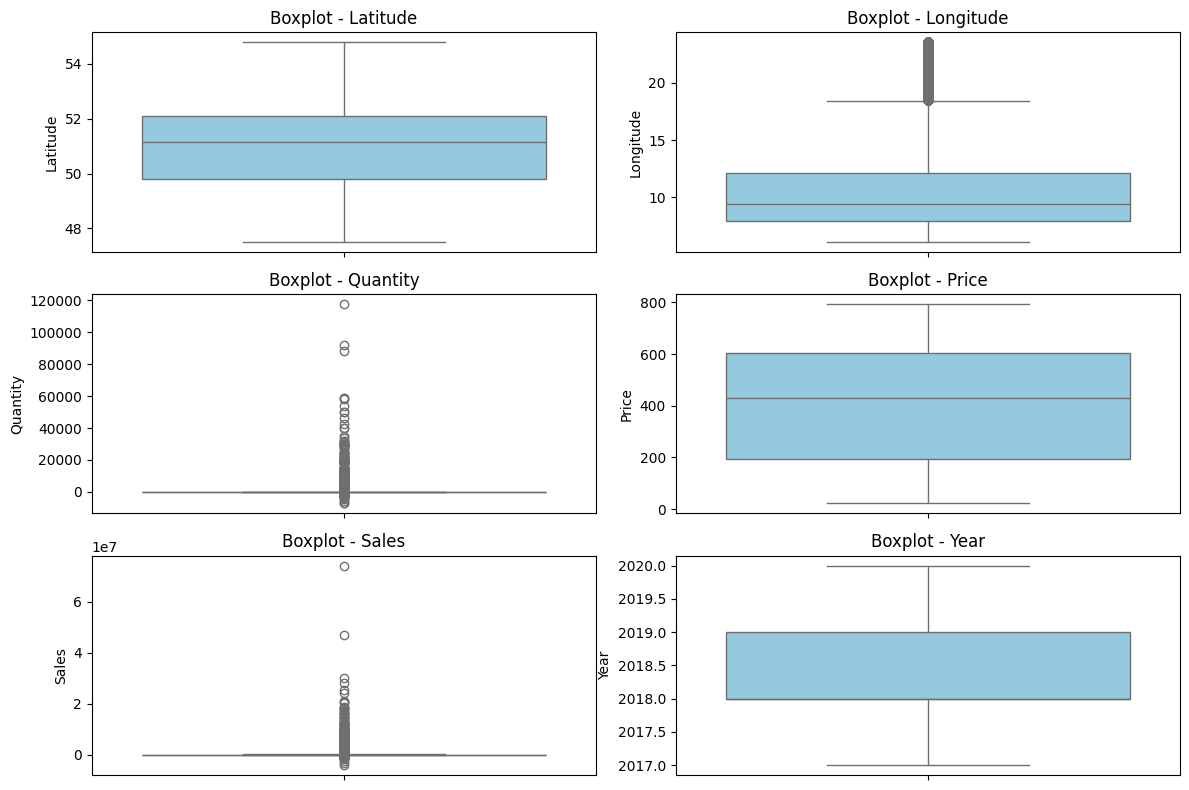

In [7]:
# cek outlier
numerical_columns = df_pharma.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns)+1)//2, 2, i)  # bikin grid 2 kolom
    sns.boxplot(y=df_pharma[col], color='skyblue')
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()


There is an outlier in the **longitude** column, but it is not a problem because the numeric value only represents spatial location.

Several outliers were found in the numeric **sales and quantity** variables.

However, these outliers were left as is because they likely represent the true behavior of high-value customers.

In [8]:
# cek duplicate
df_pharma.duplicated().sum()

np.int64(4)

In [9]:
# drop Duplicate
df_pharma = df_pharma.drop_duplicates()

In [10]:
# check whether the sales column is revenue = quantity x price
df_pharma['Revenue'] = df_pharma["Quantity"] * df_pharma["Price"]

In [11]:
df_pharma[["Quantity", "Price", "Sales", "Revenue"]].head(10)


,Quantity,Price,Sales,Revenue
0,4.0,368,1472.0,1472.0
1,7.0,591,4137.0,4137.0
2,30.0,66,1980.0,1980.0
3,6.0,435,2610.0,2610.0
4,20.0,458,9160.0,9160.0
5,5.0,123,615.0,615.0
6,20.0,536,10720.0,10720.0
7,5.0,742,3710.0,3710.0
8,4.0,551,2204.0,2204.0
9,10.0,243,2430.0,2430.0


In [12]:
# analyse negative quantity and sales
df_pharma[df_pharma['Quantity'] < 0]

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team,Revenue
3761,Rohan,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Exotropin Empizine,Mood Stabilizers,-19.0,785,-14915.0,February,2018,Anne Wu,Britanny Bold,Delta,-14915.0
3762,Rohan,Nader-Gaylord Pharmaceutical Limited,Sobótka,Poland,50.8986,16.7444,Hospital,Private,Epzipitant,Analgesics,-12.0,778,-9336.0,February,2018,Thompson Crawford,James Goodwill,Alfa,-9336.0
18526,Rohan,"Buckridge, Dach and Carroll Pharmaceutical Lim...",Luboń,Poland,52.3333,16.8833,Hospital,Private,Belavarix Benzabicin,Antibiotics,-1.0,131,-131.0,November,2018,Morris Garcia,Tracy Banks,Bravo,-131.0
22613,Prohaska-Kuhic,"Wiegand, Jast and Yost Pharma Plc",Płock,Poland,52.5500,19.7000,Hospital,Private,Afinitasol,Antipiretics,-5.0,286,-1430.0,February,2018,Jessica Smith,Britanny Bold,Delta,-1430.0
22751,Prohaska-Kuhic,Pfeffer-Hodkiewicz Pharmaceutical Ltd,Szczytno,Poland,53.5628,20.9853,Hospital,Government,Sucprine Specbalamin,Antiseptics,-50.0,182,-9100.0,March,2018,Jimmy Grey,Alisha Cordwell,Charlie,-9100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253760,Koss,Murray PLC Pharma Plc,Reinbek,Germany,53.5089,10.2483,Hospital,Private,Symbiroban,Antibiotics,-237.0,122,-28914.0,December,2020,Morris Garcia,Tracy Banks,Bravo,-28914.0
253761,Koss,Kreiger Inc,Burgdorf,Germany,52.4500,10.0083,Pharmacy,Retail,Docstryl Rivacin,Antiseptics,-660.0,789,-520740.0,December,2020,Daniel Gates,Alisha Cordwell,Charlie,-520740.0
253762,Koss,"Gerhold, Mills and Effertz Pharma Plc",Stadthagen,Germany,52.3247,9.2069,Hospital,Private,Pulmofine,Antibiotics,-30.0,688,-20640.0,December,2020,Stella Given,Alisha Cordwell,Charlie,-20640.0
253763,Koss,Pfeffer-Kirlin Pharmacy,Ahlen,Germany,51.7633,7.8911,Pharmacy,Institution,Abatatriptan,Antibiotics,-1100.0,742,-816200.0,December,2020,Stella Given,Alisha Cordwell,Charlie,-816200.0


If there's a negative value, it's usually a data error (e.g., incorrect input, a system bug, or a negative recorded price/quantity).

If it's still used, it can bias the analysis results.

In [13]:
# drop data with negative Quantity
df_pharma = df_pharma[df_pharma['Quantity'] >= 0]

In [14]:
# cek number of customer
df_pharma["Customer Name"].value_counts()

,count
Customer Name,
"Spinka, Schowalter and Conn",434
Weber Ltd Pharmaceutical Ltd,431
"Fritsch, Hodkiewicz and Sipes Pharma Plc",431
"Nolan, DuBuque and Schultz",429
Corkery-Kovacek Pharm,428
...,...
Fadel-West,172
"Bernier, Murphy and Rau Pharmaceutical Ltd",164
"Wiegand, Jast and Yost Pharma Plc",163


In [15]:
# check managers with negative quantity and sales
df_pharma[df_pharma['Quantity'] < 0]["Manager"].value_counts()

,count
Manager,


In [16]:
# Analyse Dimentions
categorical_cols = df_pharma.select_dtypes(include='object').columns
for col in df_pharma[categorical_cols]:
    print("****** "+ col+ " ******:")
    print(df_pharma[col].value_counts())
    print()
    print()

****** Distributor ******:
Distributor
Gerlach LLC               110595
Koss                       56893
Erdman                     25916
Stehr-Champlin             11942
Smith Inc                   6802
Gottlieb-Cruickshank        6427
Prohaska-Kuhic              6093
Kozey-Emmerich              4298
Beier                       3311
Welch-Langworth             3115
Cassin                      3006
Daugherty-Rempel            1941
Rohan and Sons              1559
Romaguera-Fay               1354
Rohan                       1181
Crist Inc                   1156
Lockman                     1011
Lesch                        974
Gleason                      779
Lindgren-Simonis Pharm       759
Schaefer LLC                 572
Nader-Gaylord                324
Hansen Group Pharm           317
Schuppe Inc                  269
Rogahn-Klein                 227
Graham and Sons              213
Carter-Conn                  181
Bashirian-Kassulke           178
Kris LLC                      52
Name

In [17]:
# Berapa banyak manager unik di tiap Sales Team
team_manager = df_pharma.groupby(["Sales Team", "Manager"])
team_manager

In [18]:
# One manager one team
team_manager.groups.keys()

dict_keys([('Alfa', 'James Goodwill'), ('Bravo', 'Tracy Banks'), ('Charlie', 'Alisha Cordwell'), ('Delta', 'Britanny Bold')])

In [19]:
from IPython.display import display

channel_sales = df_pharma.groupby('Channel')['Revenue'].sum().reset_index()
subchannel_sales = df_pharma.groupby('Sub-channel')['Revenue'].sum().reset_index()

display(channel_sales)
display(subchannel_sales)

,Channel,Revenue
0,Hospital,5.649815e+09
1,Pharmacy,6.295643e+09


,Sub-channel,Revenue
0,Government,3.094931e+09
1,Institution,2.914455e+09
2,Private,2.554884e+09
3,Retail,3.381187e+09


/tmp/ipython-input-1860547346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_sales, x='Channel', y='Revenue', palette='Blues_d')


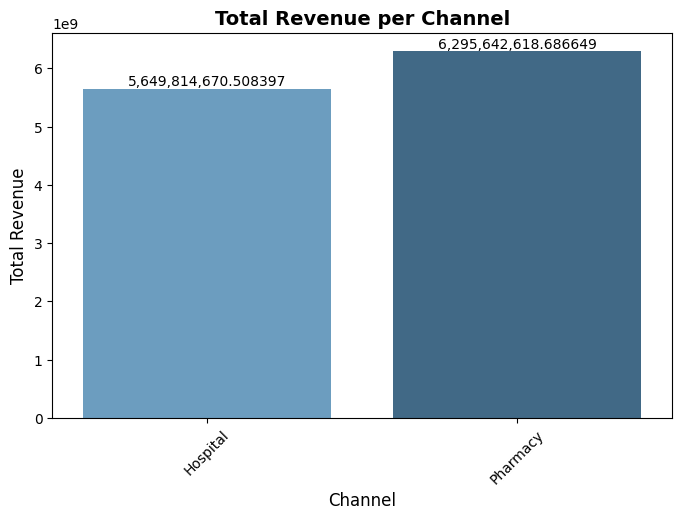

/tmp/ipython-input-1860547346.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subchannel_sales, x='Sub-channel', y='Revenue', palette='Oranges_d')


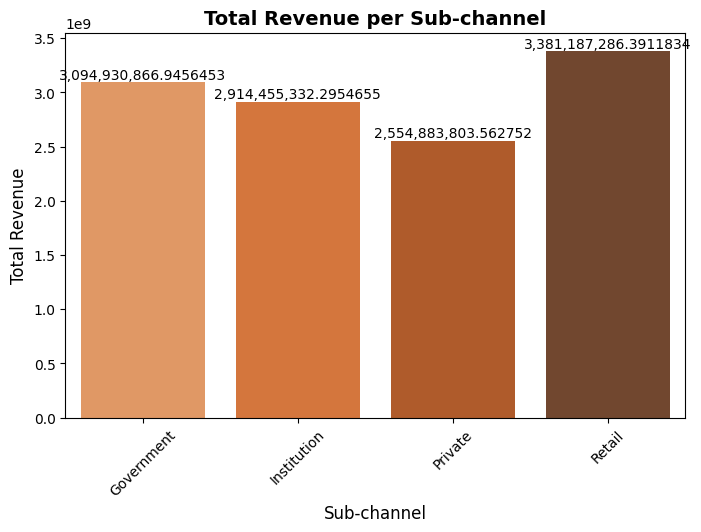

In [20]:
# Plot Channel Sales
plt.figure(figsize=(8,5))
sns.barplot(data=channel_sales, x='Channel', y='Revenue', palette='Blues_d')
plt.title('Total Revenue per Channel', fontsize=14, weight='bold')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for index, row in channel_sales.iterrows():
    plt.text(index, row['Revenue'], f"{row['Revenue']:,}",
             ha='center', va='bottom', fontsize=10)

plt.show()


# Plot Sub-channel Sales
plt.figure(figsize=(8,5))
sns.barplot(data=subchannel_sales, x='Sub-channel', y='Revenue', palette='Oranges_d')
plt.title('Total Revenue per Sub-channel', fontsize=14, weight='bold')
plt.xlabel('Sub-channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for index, row in subchannel_sales.iterrows():
    plt.text(index, row['Revenue'], f"{row['Revenue']:,}",
             ha='center', va='bottom', fontsize=10)

plt.show()


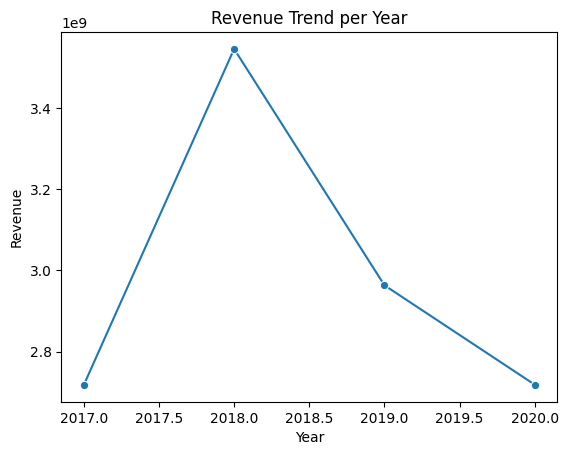

In [21]:
year_sales = df_pharma.groupby('Year')['Revenue'].sum().reset_index()

sns.lineplot(data=year_sales, x='Year', y='Revenue', marker='o')
plt.title('Revenue Trend per Year')
plt.show()


In [22]:
sales_team = df_pharma.groupby('Sales Team')['Revenue'].sum().reset_index()
fig = px.bar(sales_team, x='Sales Team', y='Revenue', title='Sales Revenue by Team')
fig.show()


## Customer Segmentation using K-Means Clustering

In [23]:
# Create Frequency & Monetary Datasets
# Calculate Revenue
df_pharma['Revenue'] = df_pharma['Quantity'] * df_pharma['Price']

# create FM dataframe
fm_df = df_pharma.groupby('Customer Name').agg({
    'Customer Name': 'count',      # Frequency = transaction amount
    'Revenue': 'sum'               # Monetary = sum of revenue
}).rename(columns={'Customer Name':'Frequency','Revenue':'Monetary'}).reset_index()

fm_df.head()

,Customer Name,Frequency,Monetary
0,Abernathy Group,346,24902609.0
1,Abernathy Group Pharmaceutical Limited,223,2079222.0
2,Abernathy Group Pharmacy,385,34975728.0
3,Abernathy and Sons,373,20999467.0
4,Abernathy and Sons Pharmaceutical Limited,390,18860508.0


In [24]:
df_pharma["Year"].value_counts()

,count
Year,
2018,93845
2017,56035
2019,51306
2020,50259


In [25]:
# Because the Frequency and Monetary scales are very different, we use MinMaxScaler or StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fm_scaled = scaler.fit_transform(fm_df[['Frequency','Monetary']])


In [26]:
k_values = range(2, 12)
WCSS = []

In [27]:
from sklearn.cluster import KMeans
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fm_scaled)
    WCSS.append(kmeans.inertia_)

In [28]:
fig = px.line(x=k_values, y=WCSS, title='Elbow Plot')
fig.update_layout(xaxis_title='Number of Clusters (K)', yaxis_title='Inertia')
fig.show()

In [29]:
# Clustering with K-Means
from sklearn.cluster import KMeans

# 3 Cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
fm_df['Cluster'] = kmeans.fit_predict(fm_scaled)

fm_df.head()


,Customer Name,Frequency,Monetary,Cluster
0,Abernathy Group,346,24902609.0,0
1,Abernathy Group Pharmaceutical Limited,223,2079222.0,1
2,Abernathy Group Pharmacy,385,34975728.0,2
3,Abernathy and Sons,373,20999467.0,0
4,Abernathy and Sons Pharmaceutical Limited,390,18860508.0,0


In [30]:
#result
cluster_summary = (
    fm_df.groupby('Cluster')
    .agg({
        'Frequency': 'mean',
        'Monetary': 'mean',
        'Customer Name': 'count'
    })
    .rename(columns={
        'Frequency': 'Avg_Frequency',
        'Monetary': 'Avg_Monetary',
        'Customer Name': 'Customer_Count'
    })
    .reset_index()
)

cluster_summary['Avg_Frequency'] = cluster_summary['Avg_Frequency'].round(2)
cluster_summary['Avg_Monetary'] = cluster_summary['Avg_Monetary'].round(2)

cluster_summary


,Cluster,Avg_Frequency,Avg_Monetary,Customer_Count
0,0,381.79,17830673.54,452
1,1,202.32,3405283.35,200
2,2,387.99,32373092.70,99


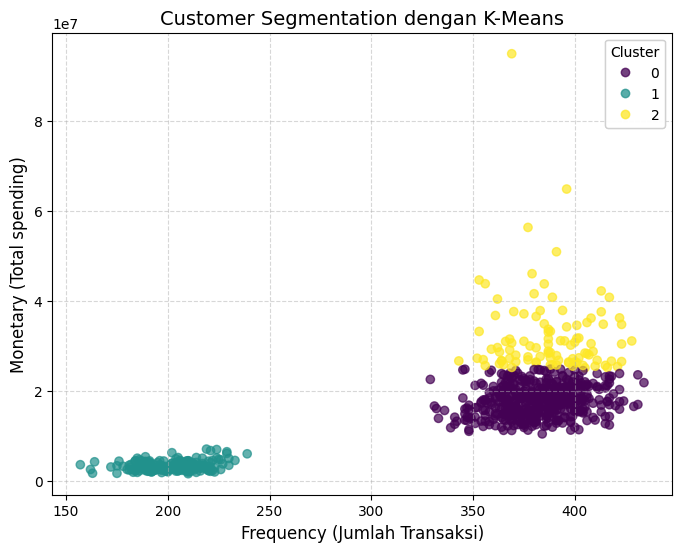

In [32]:
#visualization
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    fm_df['Frequency'],
    fm_df['Monetary'],
    c=fm_df['Cluster'],
    cmap='viridis',
    alpha=0.7
)

# Tambah label & grid
plt.xlabel('Frequency (Jumlah Transaksi)', fontsize=12)
plt.ylabel('Monetary (Total spending)', fontsize=12)
plt.title('Customer Segmentation dengan K-Means', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Tambah legend sesuai cluster
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.gca().add_artist(legend1)

plt.show()

In [ ]:
df_pharma = df_pharma.merge(
    fm_df[['Customer Name', 'Frequency', 'Monetary', 'Cluster']],
    on='Customer Name',
    how='left'
)


In [ ]:
df_pharma

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,...,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team,Revenue,Frequency,Monetary,Cluster
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,...,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta,1472.0,195,2741283.0,1
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,...,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta,4137.0,183,2021466.0,1
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,...,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo,1980.0,157,3694840.0,1
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,...,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta,2610.0,191,2789921.0,1
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,...,9160.0,January,2018,Anne Wu,Britanny Bold,Delta,9160.0,184,4530078.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251440,Bashirian-Kassulke,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,49.5103,11.2772,Hospital,Private,Pentastrin,Antibiotics,...,456743.0,December,2020,Thompson Crawford,James Goodwill,Alfa,456743.0,400,17931269.0,0
251441,Bashirian-Kassulke,Hane Ltd Pharmaceutical Ltd,Aichach,Germany,48.4500,11.1333,Hospital,Private,Abranatal Lysoprosate,Antiseptics,...,294192.0,December,2020,Anne Wu,Britanny Bold,Delta,294192.0,364,18645751.0,0
251442,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,53.5167,8.1333,Pharmacy,Retail,Adideine,Mood Stabilizers,...,216960.0,December,2020,Abigail Thompson,Tracy Banks,Bravo,216960.0,378,18103702.0,0
251443,Bashirian-Kassulke,Balistreri Group Pharm,Böblingen,Germany,48.6833,9.0000,Hospital,Government,Feruprazole,Mood Stabilizers,...,64975.0,December,2020,Stella Given,Alisha Cordwell,Charlie,64975.0,392,18145439.0,0


In [ ]:
# Export ke CSV
df_pharma.to_csv("data_pharma.csv", index=False)


In [ ]:
from google.colab import files
files.download("data_pharma.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>